In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
suicide = pd.read_csv('/content/foreveralone.csv')
suicide.head()


,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [ ]:
for column in suicide.columns:
    print(f"Unique value counts for {column}:")
    print(suicide[column].value_counts())
    print()

Unique value counts for time:
5/18/2016 7:41:18     2
5/17/2016 20:04:18    1
5/18/2016 17:26:15    1
5/18/2016 18:44:01    1
5/18/2016 18:32:30    1
                     ..
5/18/2016 3:06:44     1
5/18/2016 3:06:09     1
5/18/2016 3:04:00     1
5/18/2016 2:58:31     1
9/4/2016 23:10:04     1
Name: time, Length: 468, dtype: int64

Unique value counts for gender:
Male                  393
Female                 73
Transgender male        2
Transgender female      1
Name: gender, dtype: int64

Unique value counts for sexuallity:
Straight       415
Bisexual        46
Gay/Lesbian      8
Name: sexuallity, dtype: int64

Unique value counts for age:
0.189655    46
0.155172    41
0.172414    40
0.137931    39
0.103448    39
0.206897    37
0.120690    32
0.224138    30
0.241379    26
0.275862    21
0.310345    16
0.258621    15
0.293103    14
0.086207    13
0.327586    10
0.362069     6
0.396552     6
0.344828     5
0.068966     5
0.051724     4
0.448276     4
0.379310     3
0.000000     2
0.41

In [ ]:
# Label Encoding to run heatmap

le = LabelEncoder()
suicide = suicide.apply(lambda col: le.fit_transform(col))

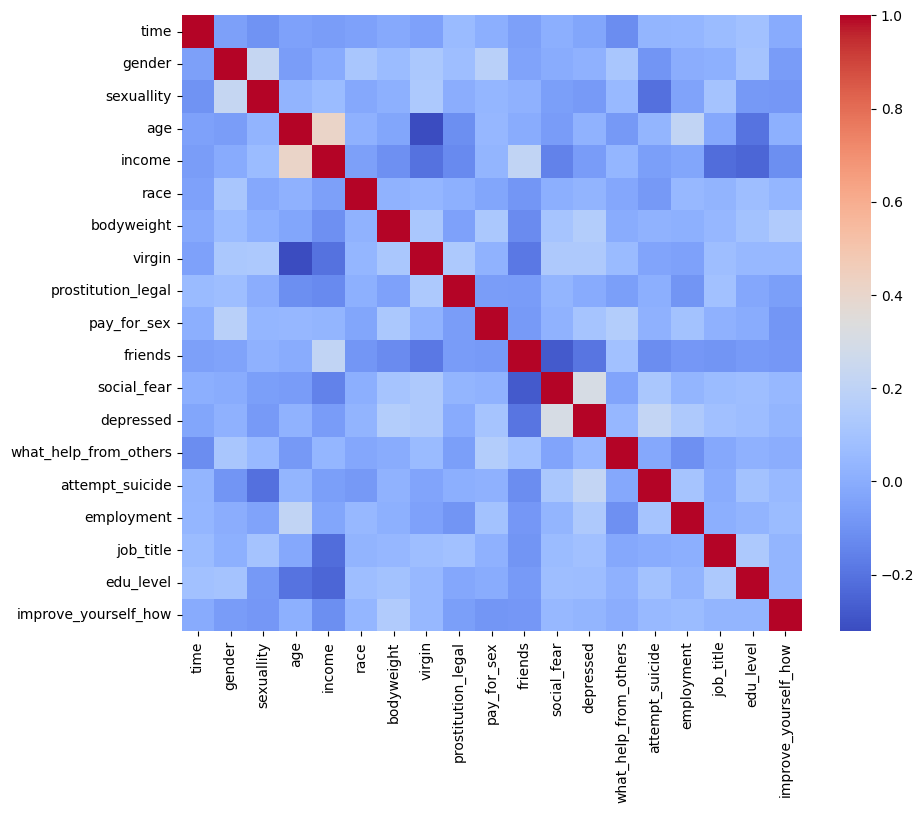

In [ ]:
# Heat map (non-numerical)

corr_matrix = suicide.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.show()

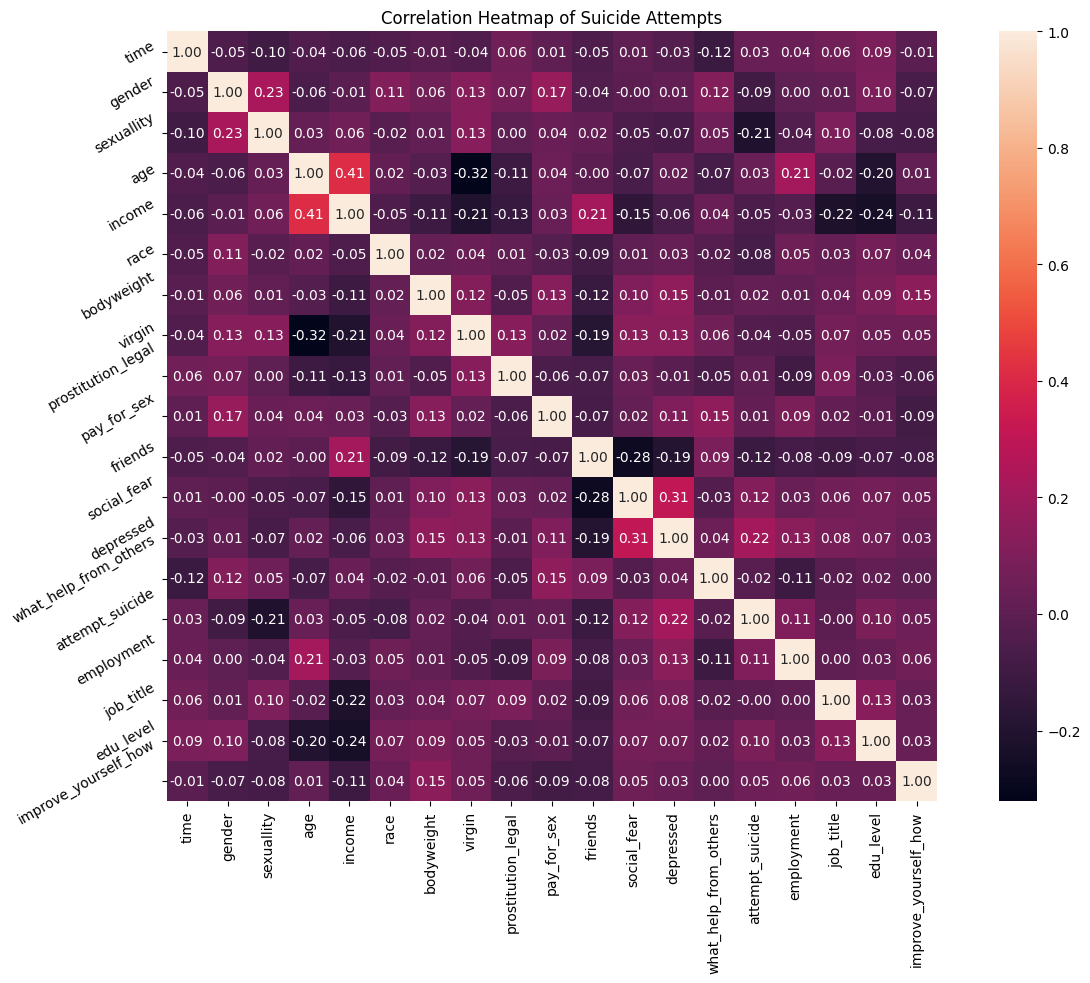

In [ ]:
# Heatmap (numerical)

correlation = suicide.corr()
plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap of Suicide Attempts')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
suicide = pd.read_csv('/content/foreveralone.csv')

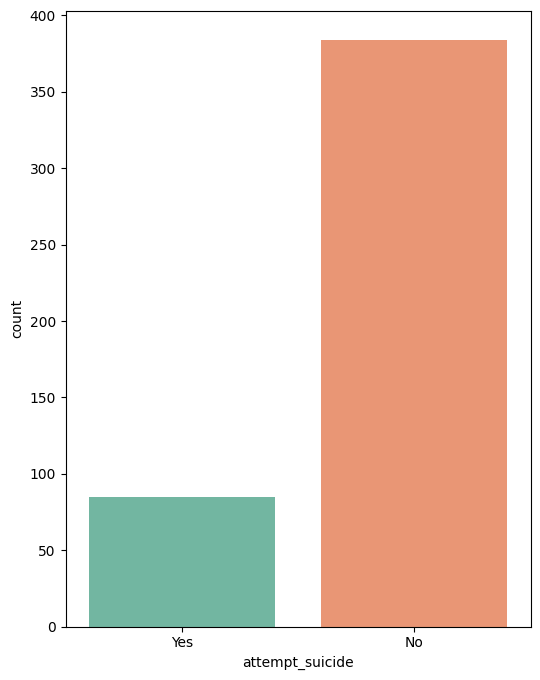

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="attempt_suicide", data=suicide, palette="Set2")
plt.show()

In [ ]:
suicide.isnull().sum()

time                      0
gender                    0
sexuallity                0
age                       0
income                    0
race                      0
bodyweight                0
virgin                    0
prostitution_legal        0
pay_for_sex               0
friends                   0
social_fear               0
depressed                 0
what_help_from_others     0
attempt_suicide           0
employment                0
job_title                12
edu_level                 0
improve_yourself_how      0
dtype: int64

In [ ]:
# Deal with null values

suicide = suicide.drop(['job_title'], axis = 1)

suicide.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,0.396552,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.000000,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,0.155172,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.000000,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,0.172414,$0,White non-Hispanic,Overweight,Yes,No,No,0.016667,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,0.120690,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,0.013333,Yes,Yes,date coaching,No,A student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,0.189655,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,0.016667,No,Yes,I don't want help,No,Employed for wages,"High school graduate, diploma or the equivalen...",None


In [ ]:
# Drop less priortised columns/columns that require NLP

suicide = suicide.drop(['improve_yourself_how', 'time', 'what_help_from_others'], axis = 1)

suicide.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide,employment,edu_level
0,Male,Straight,0.396552,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.000000,Yes,Yes,Yes,Employed for wages,Associate degree
1,Male,Bisexual,0.155172,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.000000,Yes,Yes,No,Out of work and looking for work,"Some college, no degree"
2,Male,Straight,0.172414,$0,White non-Hispanic,Overweight,Yes,No,No,0.016667,Yes,Yes,No,Out of work but not currently looking for work,"Some college, no degree"
3,Male,Straight,0.120690,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,0.013333,Yes,Yes,No,A student,"Some college, no degree"
4,Male,Straight,0.189655,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,0.016667,No,Yes,No,Employed for wages,"High school graduate, diploma or the equivalen..."


In [ ]:
# deleting income, race
suicide = suicide.drop(['income', 'race'], axis = 1)


In [ ]:
# one-hot encoding bodyweight

encoded_columns = pd.get_dummies(suicide['bodyweight'])

# Drop the original column from 'df'
suicide = suicide.drop('bodyweight', axis=1)

# Concatenate the one-hot encoded columns with the original DataFrame
suicide = pd.concat([suicide, encoded_columns], axis=1)


suicide.head()

,gender,sexuallity,age,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide,employment,edu_level,Normal weight,Obese,Overweight,Underweight
0,Male,Straight,0.396552,Yes,No,No,0.000000,Yes,Yes,Yes,Employed for wages,Associate degree,1,0,0,0
1,Male,Bisexual,0.155172,Yes,No,No,0.000000,Yes,Yes,No,Out of work and looking for work,"Some college, no degree",0,0,0,1
2,Male,Straight,0.172414,Yes,No,No,0.016667,Yes,Yes,No,Out of work but not currently looking for work,"Some college, no degree",0,0,1,0
3,Male,Straight,0.120690,Yes,Yes,No,0.013333,Yes,Yes,No,A student,"Some college, no degree",0,0,1,0
4,Male,Straight,0.189655,No,No,Yes and I have,0.016667,No,Yes,No,Employed for wages,"High school graduate, diploma or the equivalen...",0,0,1,0


In [ ]:
# one-hot encoding gender

encoded_columns = pd.get_dummies(suicide['gender'])

# Drop the original column from 'df'
suicide = suicide.drop('gender', axis=1)

# Concatenate the one-hot encoded columns with the original DataFrame
suicide = pd.concat([suicide, encoded_columns], axis=1)


suicide.head()
suicide.shape

(469, 19)

In [ ]:
# one-hot encoding sexuallity

encoded_columns = pd.get_dummies(suicide['sexuallity'])

# Drop the original column from suicide
suicide = suicide.drop('sexuallity', axis=1)

# Concatenate the one-hot encoded columns with the original DataFrame
suicide = pd.concat([suicide, encoded_columns], axis=1)

suicide.head()

,age,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide,employment,edu_level,...,Obese,Overweight,Underweight,Female,Male,Transgender female,Transgender male,Bisexual,Gay/Lesbian,Straight
0,0.396552,Yes,No,No,0.000000,Yes,Yes,Yes,Employed for wages,Associate degree,...,0,0,0,0,1,0,0,0,0,1
1,0.155172,Yes,No,No,0.000000,Yes,Yes,No,Out of work and looking for work,"Some college, no degree",...,0,0,1,0,1,0,0,1,0,0
2,0.172414,Yes,No,No,0.016667,Yes,Yes,No,Out of work but not currently looking for work,"Some college, no degree",...,0,1,0,0,1,0,0,0,0,1
3,0.120690,Yes,Yes,No,0.013333,Yes,Yes,No,A student,"Some college, no degree",...,0,1,0,0,1,0,0,0,0,1
4,0.189655,No,No,Yes and I have,0.016667,No,Yes,No,Employed for wages,"High school graduate, diploma or the equivalen...",...,0,1,0,0,1,0,0,0,0,1


In [ ]:
# binary mapping columns: virgin, prostitution_legal, pay_for_sex, social_fear, depressed, attempt_suicide

suicide['virgin'] = suicide['virgin'].map({'Yes':1,'No':0})

suicide['prostitution_legal'] = suicide['prostitution_legal'].map({'Yes':1,'No':0})

suicide['pay_for_sex'] = suicide['pay_for_sex'].map({'No':0,"Yes but I haven't": 0, "Yes and I have": 1})

suicide['social_fear'] = suicide['social_fear'].map({'Yes':1,'No':0})

suicide['depressed'] = suicide['depressed'].map({'Yes':1,'No':0})

suicide['attempt_suicide'] = suicide['attempt_suicide'].map({'Yes':1,'No':0})

suicide.head()

suicide.isnull().sum()

age                   0
virgin                0
prostitution_legal    0
pay_for_sex           0
friends               0
social_fear           0
depressed             0
attempt_suicide       0
employment            0
edu_level             0
Normal weight         0
Obese                 0
Overweight            0
Underweight           0
Female                0
Male                  0
Transgender female    0
Transgender male      0
Bisexual              0
Gay/Lesbian           0
Straight              0
dtype: int64

In [ ]:
# mapping edu-level (degree vs non-degree)

suicide['edu_level'] = suicide['edu_level'].map({'Some college, no degree':0, 'High school graduate, diploma or the equivalent (for example: GED)': 0,
                                           'Some high school, no diploma': 0, 'Trade/technical/vocational training': 0,
                                           'Bachelor’s degree':1, 'Master’s degree':1, 'Associate degree':1,
                                           'Professional degree':1, 'Doctorate degree':1})


print(suicide['edu_level'])


0      1
1      0
2      0
3      0
4      0
      ..
464    1
465    0
466    0
467    0
468    1
Name: edu_level, Length: 469, dtype: int64


In [ ]:
# mapping employment (currently working vs currently unemployed)

suicide['employment'] = suicide['employment'].map({'A student': 1, 'Employed for wages': 1, 'Self-employed': 1,
                                                 'Out of work but not currently looking for work': 0,
                                                 'Out of work and looking for work':0, 'Unable to work': 0, 'Military': 0,
                                                 'Retired': 0, 'A homemaker': 0})


print(suicide['employment'])

0      1
1      0
2      0
3      1
4      1
      ..
464    1
465    1
466    1
467    0
468    1
Name: employment, Length: 469, dtype: int64


In [ ]:
suicide.head()

,age,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide,employment,edu_level,...,Obese,Overweight,Underweight,Female,Male,Transgender female,Transgender male,Bisexual,Gay/Lesbian,Straight
0,0.396552,1,0,0,0.000000,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0.155172,1,0,0,0.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0.172414,1,0,0,0.016667,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0.120690,1,1,0,0.013333,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0.189655,0,0,1,0.016667,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
# scaling features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

suicide[['friends', 'age']] = scaler.fit_transform(suicide[['friends', 'age']])

suicide.head()

,age,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide,employment,edu_level,...,Obese,Overweight,Underweight,Female,Male,Transgender female,Transgender male,Bisexual,Gay/Lesbian,Straight
0,0.396552,1,0,0,0.000000,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0.155172,1,0,0,0.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0.172414,1,0,0,0.016667,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0.120690,1,1,0,0.013333,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0.189655,0,0,1,0.016667,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
# Assuming 'attempt_suicide' is the target variable and rest are features
features = ['age', 'virgin', 'prostitution_legal', 'pay_for_sex', 'friends',
            'social_fear', 'depressed', 'employment', 'edu_level', 'Normal weight',
            'Obese', 'Overweight', 'Underweight', 'Female', 'Male', 'Transgender female',
            'Transgender male', 'Bisexual', 'Gay/Lesbian', 'Straight']
X = suicide[features]  # Features
y = suicide['attempt_suicide']  # Target variable

In [ ]:
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)


logistic regression Accuracy: 0.8156028368794326


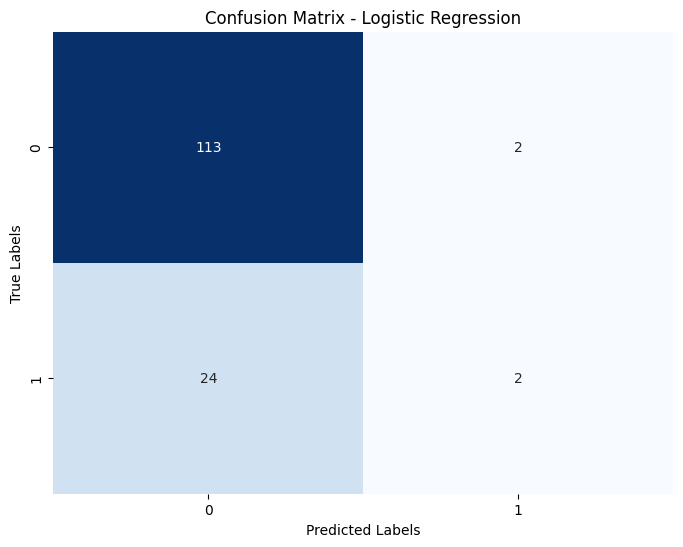

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.82      0.98      0.90       115
     Class 1       0.50      0.08      0.13        26

    accuracy                           0.82       141
   macro avg       0.66      0.53      0.52       141
weighted avg       0.76      0.82      0.76       141



In [ ]:
# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier using the training data
logistic_classifier.fit(X_train, y_train)

# Predict using the test data
logistic_y_pred = logistic_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
logistic_accuracy = metrics.accuracy_score(y_test, logistic_y_pred)
print(f"logistic regression Accuracy: {logistic_accuracy}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score and display classification report
print("Classification Report:")
print(classification_report(y_test, logistic_y_pred, target_names=['Class 0', 'Class 1']))

In [ ]:
#For KNN
x = suicide.columns.tolist

# Getting all the features and setting x and y variables
features = ['age', 'virgin', 'prostitution_legal', 'pay_for_sex', 'friends',
            'social_fear', 'depressed', 'employment', 'edu_level', 'Normal weight',
            'Obese', 'Overweight', 'Underweight', 'Female', 'Male', 'Transgender female',
            'Transgender male', 'Bisexual', 'Gay/Lesbian', 'Straight']
X = suicide[features]  # Features
y = suicide['attempt_suicide']


In [ ]:
# Split the data into training and testing sets and setting 30% of the dataset as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # No stratify as accuracy decrease


# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using the training data
knn_classifier.fit(X_train, y_train)

# Predict using the test data
knn_y_pred = knn_classifier.predict(X_test)

KNN Accuracy: 0.8014184397163121


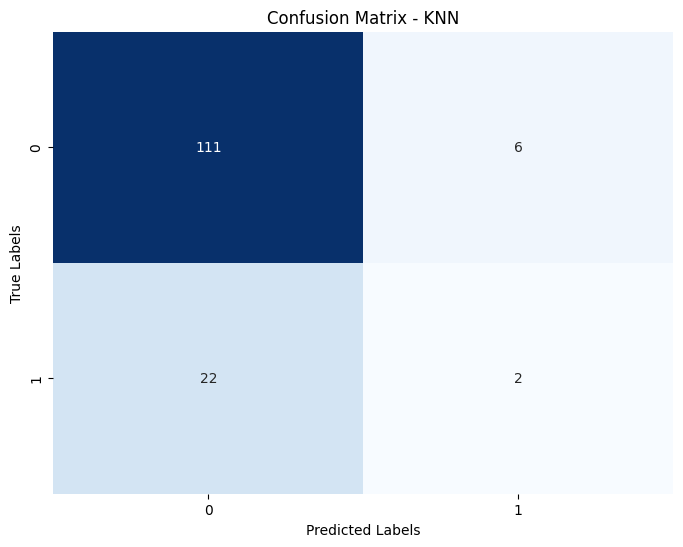

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      0.95      0.89       117
     Class 1       0.25      0.08      0.12        24

    accuracy                           0.80       141
   macro avg       0.54      0.52      0.51       141
weighted avg       0.74      0.80      0.76       141



In [ ]:
# Evaluate the accuracy of the classifier
knn_accuracy = metrics.accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, knn_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score and display classification report
print("Classification Report:")
print(classification_report(y_test, knn_y_pred, target_names=['Class 0', 'Class 1']))

Decision tree accuracy 0.8014184397163121


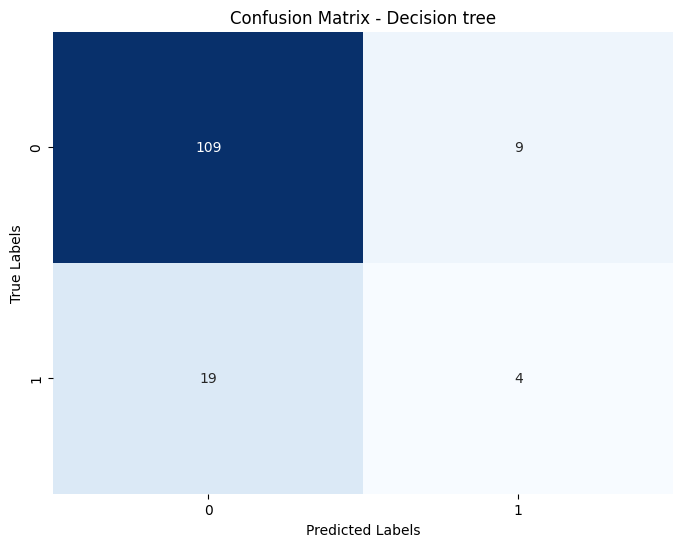

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.92      0.89       118
     Class 1       0.31      0.17      0.22        23

    accuracy                           0.80       141
   macro avg       0.58      0.55      0.55       141
weighted avg       0.76      0.80      0.78       141



In [ ]:
#For Decision Tree
# Split the data into training and testing sets and setting 30% of the dataset as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)   # No stratify as accuracy decrease
obj = DecisionTreeClassifier(criterion = 'gini', random_state = 1)                              # bux uses entropy

obj.fit(X_train, y_train)
decision_tree_y_pred = obj.predict(X_test)

Decision_tree_score = accuracy_score(decision_tree_y_pred, y_test)
print(f"Decision tree accuracy {Decision_tree_score}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, decision_tree_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score and display classification report
print("Classification Report:")
print(classification_report(y_test, decision_tree_y_pred, target_names=['Class 0', 'Class 1']))

SVM Accuracy: 0.8297872340425532


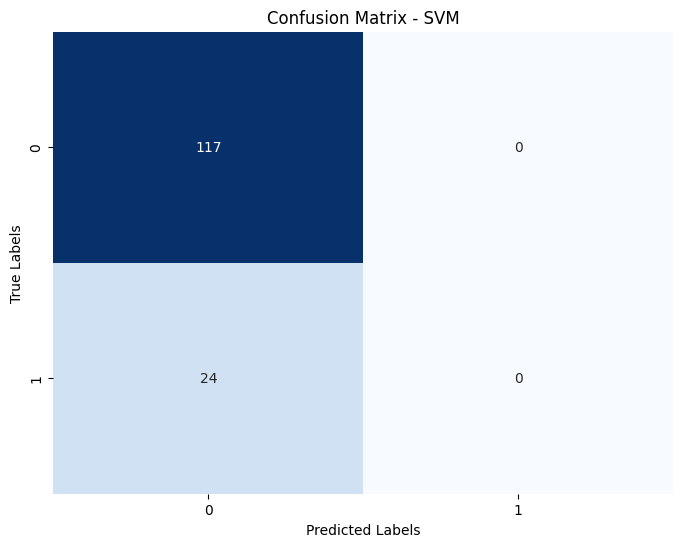

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.91       117
     Class 1       0.00      0.00      0.00        24

    accuracy                           0.83       141
   macro avg       0.41      0.50      0.45       141
weighted avg       0.69      0.83      0.75       141



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SVM


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# # linear kernel
# obj_svm = svm.SVC(kernel='linear')

# # polynomial kernel
# obj_svm = svm.SVC(kernel='poly', degree=20)

# radial basis function (RBF) kernel
obj_svm = svm.SVC(kernel='rbf', C=1.0, gamma='auto')

# obj_svm = svm.SVC(kernel='rbf', C=10.0, gamma='auto')
# obj_svm = svm.SVC(kernel='rbf', C=100.0, gamma='auto')
# obj_svm = svm.SVC(kernel='rbf', C=0.1, gamma='auto')

# Train the classifier
obj_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = obj_svm.predict(X_test)

# Calculate the accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {svm_accuracy}')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score and display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

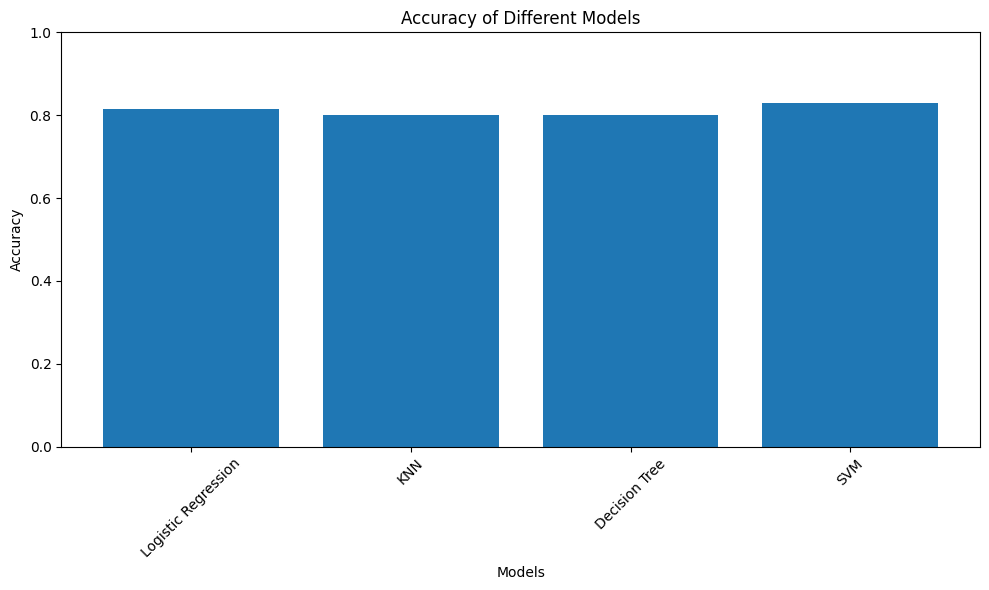

In [ ]:

# Train and evaluate models
accuracies = {
    "Logistic Regression":logistic_accuracy,
    "KNN":knn_accuracy,
    "Decision Tree": Decision_tree_score,
    "SVM":svm_accuracy
}

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.0, 1.0)  # Set y-axis limits between 0 and 1 for accuracy
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()